In [1]:
from matplotlib import pyplot as plt # Import pyplot as plt from the library matplotlib
import scipy
import numpy as np # Import the library numpy under the name np
import numpy.random

In [2]:
n = 200
I0 = 3
I1 = 0.4
K = 2 # Get the number of eigenvectors to graph on a same plot, starting with the 1st eigenvecto
y = [0, 1, 198] # Creates an empty list that'll be used to store which ordered eigenvectors will be graphed
h = 0.01 # Coefficient setting the maximum randomness

In [3]:
I2 = 1
I3 = 0

In [4]:
A = np.eye(n, n, k=-1)*I1 + np.eye(n, n)*I0 + np.eye(n, n, k=1)*I1  # Tridiagonal matrix without disorder
print(A)

[[ 3.   0.4  0.  ...,  0.   0.   0. ]
 [ 0.4  3.   0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  3.  ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  3.   0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  3.   0.4]
 [ 0.   0.   0.  ...,  0.   0.4  3. ]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(A) # Get the eigenvectors and eigenvalues of the ordered matrix
print(eigenvalues)

[ 2.20009771  2.20039083  2.20087929  2.20156295  2.20244167  2.20351521
  2.20478333  2.20624571  2.20790199  2.20975177  2.21179459  2.21402997
  2.21645734  2.21907612  2.22188568  2.22488531  2.22807429  2.23145185
  2.23501715  2.23876933  2.24270746  2.24683059  2.25113771  2.25562776
  2.26029966  2.26515225  2.27018436  2.27539475  2.28078215  2.28634525
  2.29208268  2.29799304  2.3040749   2.31032676  2.3167471   2.32333435
  2.3300869   2.3370031   2.34408126  2.35131965  2.35871651  2.36627002
  2.37397835  2.3818396   2.38985186  2.39801317  2.40632154  2.41477493
  2.42337129  2.43210851  2.44098446  2.44999697  2.45914383  2.46842282
  2.47783167  2.48736807  2.49702971  2.50681421  2.51671919  2.52674223
  2.53688088  2.54713266  2.55749508  2.56796559  2.57854164  2.58922065
  2.6         2.61087707  2.6218492   2.6329137   2.64406788  2.655309
  2.66663433  2.6780411   2.68952652  2.70108778  2.71272206  2.72442652
  2.7361983   2.74803452  2.75993229  2.77188871  2.7

In [6]:
d = np.random.rand(n, n)*h # Generates a matrix of random numbers in range of 0 to 1, multiplied by the actual max randomness
t = np.eye(n, n, k=-1)*I3 + np.eye(n, n)*I2 + np.eye(n, n, k=1)*I3  # Unitary matrix that'll multiply the random matrix to get a disordered tridiagonal matrix

In [7]:
w = d*t # (Tri)diagonal random matrix
C = A + w # Add the random matrix and the ordered matrix together
print(C)

[[ 3.00915583  0.4         0.         ...,  0.          0.          0.        ]
 [ 0.4         3.00544112  0.4        ...,  0.          0.          0.        ]
 [ 0.          0.4         3.00987515 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  3.0051473   0.4         0.        ]
 [ 0.          0.          0.         ...,  0.4         3.00216249  0.4       ]
 [ 0.          0.          0.         ...,  0.          0.4         3.0020384 ]]


In [8]:
p, q = np.linalg.eig(C) # Get the eigenvectors and eigenvalues of the localized matrix
print(p)

[ 3.80524739  3.80507522  3.80427459  3.80384362  3.80291924  3.8018899
  3.80064639  3.79881685  3.79729788  3.79531284  3.79340558  3.79125164
  3.78896556  3.78629471  3.7832519   3.78022245  3.77728601  3.77382522
  3.77025134  3.76657054  3.76253156  3.75811466  3.75411688  3.74971874
  3.74488967  3.7400159   3.73503942  3.71315824  3.73004685  3.72460463
  3.71880639  3.70703339  3.70112726  3.6951202   3.68856351  3.68191273
  3.59037853  3.6752396   3.66840763  3.59884054  3.661192    3.60705348
  3.65388676  3.64670459  3.6391883   3.61526311  3.63143967  3.62328429
  3.57313867  3.5818388   3.54617163  3.56423747  3.55514321  3.53675884
  3.52730773  3.51796098  3.50831446  3.49849172  3.48836481  3.47855671
  3.46839593  3.45818338  3.44789912  3.36102717  3.43730568  3.42631545
  3.41600178  3.37221861  3.39428665  3.38340245  3.3497998   3.33872115
  3.40541071  3.32716522  3.31527642  3.3042885   3.29268055  3.28078047
  3.26920419  3.25739589  3.24532158  3.22117161  3.

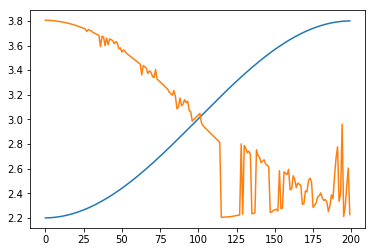

In [9]:
plt.plot(eigenvalues)
plt.plot(p)
plt.show()

In [10]:
#tri des vecteurs propres en fct des valeurs propres
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

idx = p.argsort()[::-1]   
p = p[idx]
q = q[:,idx]

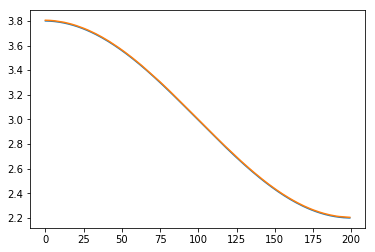

In [11]:
plt.plot(eigenvalues)
plt.plot(p)
plt.show()

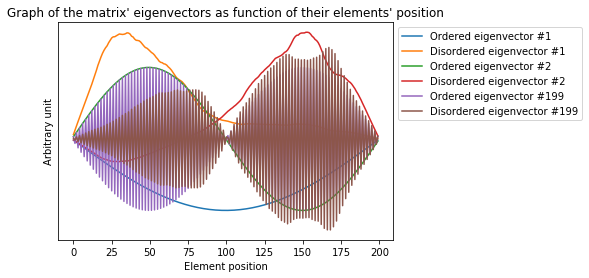

In [12]:
for j in y: # For J taking each value in the list of input eigenvectors index
    plt.plot(eigenvectors[:,j], label="Ordered eigenvector #%s" %(j+1))  # Plot the ordered eigenvector
    plt.plot(q[:,j], label="Disordered eigenvector #%s" %(j+1)) # Plot the ordered eigenvector


plt.title("Graph of the matrix' eigenvectors as function of their elements' position") # Graph's title
plt.xlabel("Element position") # x axis' label
plt.ylabel("Arbitrary unit") # y axis' label
plt.yticks([]) # Removes y axis' values since they are arbitrary
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Legend is outside the plot

plt.show()